In [78]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [79]:
def get_font_family():
    import platform 
    system_name = platform.system()

    if system_name == "Darwin" : # 맥
        font_family = "AppleGothic"
    elif system_name == "Windows": # 윈도우
        font_family = "Malgun Gothic"
    else: # 리눅스 및 코랩
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 허용

%config InlineBackend.figure_format = 'retina' # 그래프를 더 선명하게 사용

In [40]:
df = pd.read_csv("./data/smartgreed_predata.csv", low_memory=False)

In [80]:
df = pd.read_csv("./data/ami_data.csv", low_memory=False)

In [81]:
df["season"] = df["season"].apply(lambda x: x.lower())

In [82]:
df.head()

,TOC,수용가번호,법정동분류코드,측정일,측정시각,요일명,공휴일여부,SG전력사용량값,업종명,업종상세명,업무시작시간,업무종료시간,상주근무자수,온도값,습도값,강우량값,season,실제근무시간,강수여부
0,A000000001,IC0000101008021,2820010100,20180401,2,Sunday,Y,0.039,협회 및 단체 / 수리 및 기타 개인 서비스업,협회,900,1800,3,11.5,68.0,0.0,spring,900,0
1,A000000001,IC0000101000303,2820010100,20180401,20,Sunday,Y,0.180,보건업 및 사회복지 서비스업,마사지,1100,2300,2,14.1,95.0,0.0,spring,1200,0
2,A000000001,IC0000101000304,2820010100,20180401,20,Sunday,Y,0.349,전문 / 과학 및 기술 서비스업,경영컨설팅,1000,1800,1,14.1,95.0,0.0,spring,800,0
3,A000000001,IC0000101000603,2820010100,20180401,21,Sunday,Y,0.313,제조업,신문,900,1800,5,14.1,95.0,0.0,spring,900,0
4,A000000001,IC0000101000401,2820010100,20180401,20,Sunday,Y,1.948,예술 / 스포츠 및 여가관련 서비스업,스크린골프장,1000,2300,1,14.1,95.0,0.0,spring,1300,0


In [83]:
# 불쾌지수 생성
# 1.8 x 기온 - 0.55 x (1 - 습도) x (1.8 x 기온 - 26) + 32
df["불쾌지수"] = df["온도값"] * 1.8 - 0.55 * ((1 - (df["습도값"] / 100)) * (1.8 * df["온도값"] - 26)) + 32

In [84]:
# 불쾌지수 구간화
def di_binning(x):
    
    if x <= 68:
        x = "전원 쾌적"     
    elif x <= 75:      
        x = "보통"   
    elif x <= 80:      
        x = "높음"     
    else:
        x = "매우 높음"
        
    return x

In [85]:
df["불쾌지수"] = df["불쾌지수"].apply(di_binning)

In [86]:
df

,TOC,수용가번호,법정동분류코드,측정일,측정시각,요일명,공휴일여부,SG전력사용량값,업종명,업종상세명,업무시작시간,업무종료시간,상주근무자수,온도값,습도값,강우량값,season,실제근무시간,강수여부,불쾌지수
0,A000000001,IC0000101008021,2820010100,20180401,2,Sunday,Y,0.0390,협회 및 단체 / 수리 및 기타 개인 서비스업,협회,900,1800,3,11.5,68.0,0.0,spring,900,0,전원 쾌적
1,A000000001,IC0000101000303,2820010100,20180401,20,Sunday,Y,0.1800,보건업 및 사회복지 서비스업,마사지,1100,2300,2,14.1,95.0,0.0,spring,1200,0,전원 쾌적
2,A000000001,IC0000101000304,2820010100,20180401,20,Sunday,Y,0.3490,전문 / 과학 및 기술 서비스업,경영컨설팅,1000,1800,1,14.1,95.0,0.0,spring,800,0,전원 쾌적
3,A000000001,IC0000101000603,2820010100,20180401,21,Sunday,Y,0.3130,제조업,신문,900,1800,5,14.1,95.0,0.0,spring,900,0,전원 쾌적
4,A000000001,IC0000101000401,2820010100,20180401,20,Sunday,Y,1.9480,예술 / 스포츠 및 여가관련 서비스업,스크린골프장,1000,2300,1,14.1,95.0,0.0,spring,1300,0,전원 쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573279,A000000001,IC1100101000110,2818510300,20211231,6,Friday,N,0.4930,보건업 및 사회복지 서비스업,미용실,1100,2000,1,-7.3,39.0,-999.0,winter,900,0,전원 쾌적
2573280,A000000001,IC1100101000109,2818510300,20211231,6,Friday,N,0.6090,숙박 및 음식점업,식당,900,2100,2,-7.3,39.0,-999.0,winter,1200,0,전원 쾌적
2573281,A000000001,IC1100101000107,2818510300,20211231,6,Friday,N,0.5920,숙박 및 음식점업,식당,0,2300,2,-7.3,39.0,-999.0,winter,2300,0,전원 쾌적
2573282,A000000001,IC1100101000701,2818510300,20211231,6,Friday,N,0.3911,보건업 및 사회복지 서비스업,병원,0,2300,100,-7.3,39.0,-999.0,winter,2300,0,전원 쾌적


In [87]:
df.columns = ['TOC', '수용가번호', '법정동분류코드', '측정일', '측정시각', '요일명', '공휴일여부', 'SG전력사용량값',
       '업종명', '업종상세명', '업무시작시간', '업무종료시간', '상주근무자수', '온도값', '습도값', '강우량값',
       '계절', '실제근무시간', '강수여부', '불쾌지수']

In [88]:
df.drop("강수여부", axis=1, inplace=True)

In [89]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [90]:
df = df[df["강우량값"] >= 0].reset_index(drop=True)

In [91]:
def rename(x):

    if x == 2826011200:
        x = "인천광역시"
    elif x == 2820010100:
        x = "인천광역시"
    elif x == 2818510100:
        x = "인천광역시"
    elif x == 2818510300:
        x = "인천광역시"
    elif x == 4215010900:
        x = "강원도"
    elif x == 4711311700:
        x = "경상북도"
    else:
        x = np.nan

    return x

df["법정동분류코드"] = df["법정동분류코드"].apply(rename)

In [92]:
df = df[df ["법정동분류코드"] == "인천광역시"].reset_index(drop=True)

In [93]:
df.drop(["강우량값"], axis=1, inplace=True)

In [94]:
df.drop("법정동분류코드", axis=1, inplace=True)

In [19]:
df["업종명"].unique()

array(['협회 및 단체 / 수리 및 기타 개인 서비스업', '보건업 및 사회복지 서비스업',
       '전문 / 과학 및 기술 서비스업', '제조업', '예술 / 스포츠 및 여가관련 서비스업', '금융 및 보험업',
       '도매 및 소매업', '건설업', '사업시설 관리 / 사업 지원 및 임대 서비스업', '부동산업',
       '숙박 및 음식점업', '교육 서비스업', '공공 행정 / 국방 및 사회보장 행정'], dtype=object)

In [55]:
df.sort_values(by=["측정일", "업종명", "측정시각"], ascending=True)

,TOC,수용가번호,측정일,측정시각,요일명,공휴일여부,SG전력사용량값,업종명,업종상세명,업무시작시간,업무종료시간,상주근무자수,온도값,습도값,계절,실제근무시간,불쾌지수
20,A000000001,IC0000101001001,20210101,12,Friday,Y,0.126,건설업,화물,900,1800,10,-1.2,53.0,winter,900,전원 쾌적
21,A000000001,IC0000101001002,20210101,12,Friday,Y,0.284,건설업,중장비,900,1800,10,-1.2,53.0,winter,900,전원 쾌적
24,A000000001,IC0000101001102,20210101,12,Friday,Y,0.493,건설업,기계설비,900,1800,5,-1.2,53.0,winter,900,전원 쾌적
32,A000000001,IC1000101000108,20210101,12,Friday,Y,0.027,건설업,전기공사,800,1800,1,-1.2,53.0,winter,1000,전원 쾌적
35,A000000001,IC1000101000207,20210101,12,Friday,Y,0.335,건설업,설비사공,900,1800,5,-1.2,53.0,winter,900,전원 쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53767,A000000001,IC100010100B809,20211230,15,Thursday,N,0.086,제조업,전자부품,830,1800,3,-1.5,53.0,winter,970,전원 쾌적
53741,A000000001,IC0000101000801,20211230,15,Thursday,N,6.229,협회 및 단체 / 수리 및 기타 개인 서비스업,협회,900,1700,2,-1.5,53.0,winter,800,전원 쾌적
53742,A000000001,IC0000101000802,20211230,15,Thursday,N,3.864,협회 및 단체 / 수리 및 기타 개인 서비스업,협회,930,1700,2,-1.5,53.0,winter,770,전원 쾌적
53775,A000000001,IC1100101000306,20211230,15,Thursday,N,1.981,협회 및 단체 / 수리 및 기타 개인 서비스업,종교단체,900,2100,1,-1.5,53.0,winter,1200,전원 쾌적


In [95]:
df = df.drop([ "업무시작시간", "업무종료시간"], axis=1)
df["실제근무시간"]=df["실제근무시간"] / 100

In [346]:
df_1 = df_1[['측정일', '측정시각', '요일명', '공휴일여부', '업종명', '상주근무자수', '온도값',
       '습도값', '계절', '실제근무시간',"불쾌지수" ,'SG전력사용량값']]

df_2 = df_2[['측정일', '측정시각', '요일명', '공휴일여부', '업종명', '상주근무자수', '온도값',
       '습도값', '계절', '실제근무시간',"불쾌지수" ,'SG전력사용량값']]

In [21]:
df["업종명"].nunique()

13

In [19]:
work = df["업종명"].value_counts().sort_values(ascending=False)

In [20]:
work_name = []
work_per = []

for a, cnt in enumerate(work):
    work_name.append(work.index[a])
    work_per.append((cnt / len(df)) * 100)

In [36]:
work_name

['제조업',
 '도매 및 소매업',
 '숙박 및 음식점업',
 '보건업 및 사회복지 서비스업',
 '협회 및 단체 / 수리 및 기타 개인 서비스업',
 '건설업',
 '교육 서비스업',
 '금융 및 보험업',
 '전문 / 과학 및 기술 서비스업',
 '예술 / 스포츠 및 여가관련 서비스업',
 '부동산업',
 '사업시설 관리 / 사업 지원 및 임대 서비스업',
 '공공 행정 / 국방 및 사회보장 행정']

In [42]:
pd.DataFrame(index = work_name, data = work_per, )

,0
제조업,45.405963
도매 및 소매업,10.106665
숙박 및 음식점업,8.826084
보건업 및 사회복지 서비스업,7.592297
협회 및 단체 / 수리 및 기타 개인 서비스업,6.634591
건설업,4.413702
교육 서비스업,3.573820
금융 및 보험업,3.514788
전문 / 과학 및 기술 서비스업,3.145840
예술 / 스포츠 및 여가관련 서비스업,2.930470


In [57]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le = LabelEncoder()

In [97]:
df.drop("측정일", axis=1, inplace=True)

In [98]:
df["요일명"] = le.fit_transform(df["요일명"])
df["계절"] = le.fit_transform(df["계절"])
df["공휴일여부"] = le.fit_transform(df["공휴일여부"])
df["불쾌지수"] = le.fit_transform(df["불쾌지수"])

dummy = pd.get_dummies(df["업종명"])

df = pd.concat([df, dummy], axis=1).drop("업종명", axis=1)

In [99]:
df.drop("업종상세명", axis=1, inplace=True)

In [100]:
df.drop(["TOC", "수용가번호"], axis=1, inplace=True)

In [102]:
X = df.drop("SG전력사용량값", axis=1)
y = df["SG전력사용량값"]

In [383]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [384]:
from sklearn.preprocessing import RobustScaler

mm = RobustScaler()

scaled_train = mm.fit_transform(X_train)
scaled_valid = mm.transform(X_valid)
scaled_test = mm.transform(X_test)

In [385]:
import numpy as np

In [386]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

xgb = XGBRegressor()

xgb.fit(scaled_train, y_train)

xgb_pred = xgb.predict(scaled_test)
print(np.sqrt(mean_squared_error(y_test, xgb_pred)))
print(mean_absolute_error(y_test, xgb_pred))
print(mean_absolute_percentage_error(y_test, xgb_pred))

2.5878630095107247
1.2002606114622814
17.182078910738028


In [387]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(scaled_train, y_train)

lgb_pred = lgb.predict(scaled_test)
print(np.sqrt(mean_squared_error(y_test, lgb_pred)))
print(mean_absolute_error(y_test, lgb_pred))
print(mean_absolute_percentage_error(y_test, lgb_pred))

2.659001664171841
1.2384603233508615
18.16917728280143


In [411]:
model = Sequential()
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True), input_shape=(22, 1)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(128, activation="tanh", return_sequences=False, kernel_regularizer=regularizers.l2(0.01))))
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))



lr = 1e-3
optim = keras.optimizers.Adam(lr=lr)

early_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

model.compile(loss="mean_squared_error", optimizer=optim, metrics="mean_squared_error")

history = model.fit(scaled_train, y_train, validation_data=[scaled_valid, y_valid], batch_size=128,
          epochs=500, callbacks=[early_cb, reduce_lr])

pred_lstm = model.predict(scaled_test)
print(np.sqrt(mean_squared_error(y_test, pred_lstm)))
print(mean_absolute_error(y_test, pred_lstm))
print(mean_absolute_percentage_error(y_test, pred_lstm))

Epoch 1/500
4168/4168 [==============================] - 95s 21ms/step - loss: 10.1723 - mean_squared_error: 9.2857 - val_loss: 9.7447 - val_mean_squared_error: 9.4599 - lr: 0.0010
Epoch 2/500
4168/4168 [==============================] - 85s 20ms/step - loss: 8.5186 - mean_squared_error: 8.2949 - val_loss: 8.6765 - val_mean_squared_error: 8.4579 - lr: 0.0010
Epoch 3/500
4168/4168 [==============================] - 105s 25ms/step - loss: 8.2497 - mean_squared_error: 8.0394 - val_loss: 8.6985 - val_mean_squared_error: 8.5011 - lr: 0.0010
Epoch 4/500
4168/4168 [==============================] - 84s 20ms/step - loss: 8.0908 - mean_squared_error: 7.9003 - val_loss: 8.3035 - val_mean_squared_error: 8.1285 - lr: 0.0010
Epoch 5/500
4168/4168 [==============================] - 86s 21ms/step - loss: 7.9434 - mean_squared_error: 7.7529 - val_loss: 8.1824 - val_mean_squared_error: 8.0009 - lr: 0.0010
Epoch 6/500
4168/4168 [==============================] - 84s 20ms/step - loss: 7.8213 - mean_squar

c:\Users\D\Anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\D\Anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\D\Anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


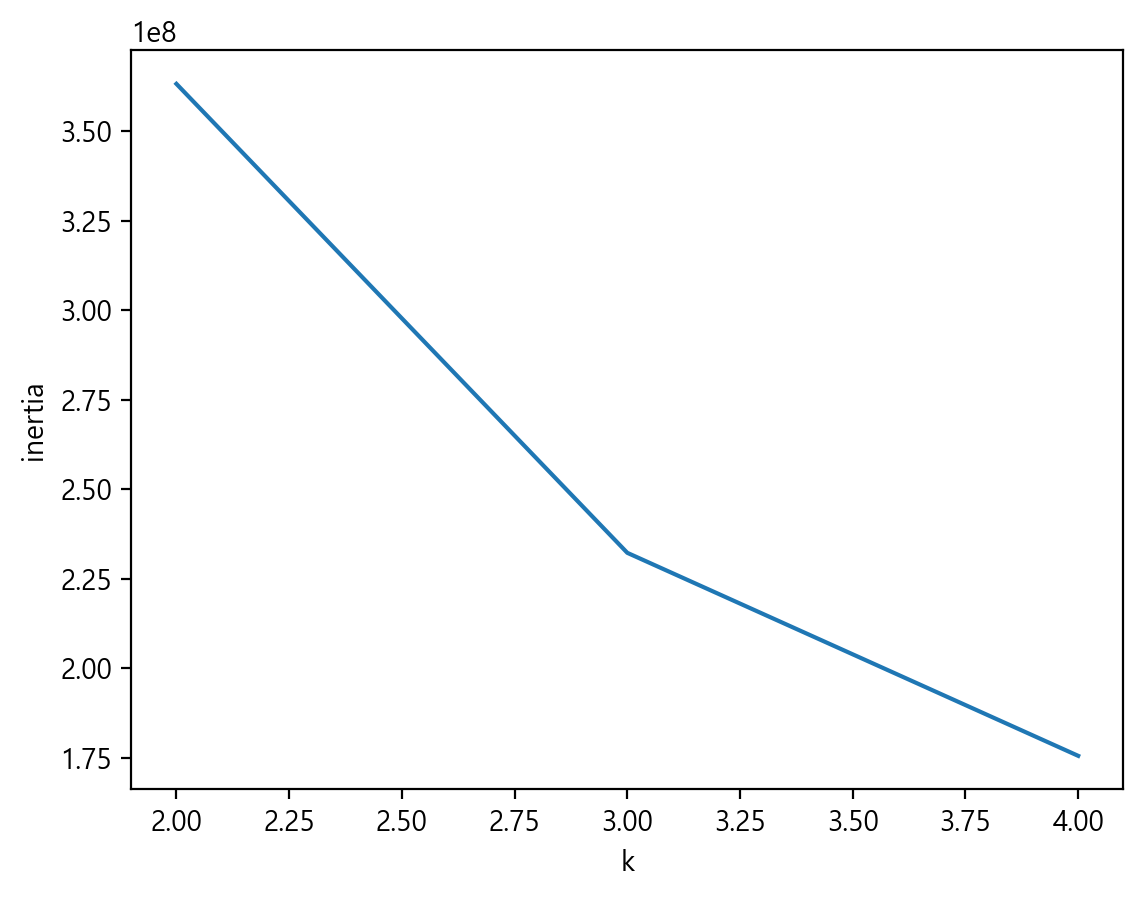

In [388]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 5):
    km = KMeans(n_clusters = k, random_state = 29)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 5), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [111]:
X.shape

(833450, 22)

In [112]:
from sklearn.cluster import KMeans

km = KMeans(3)
clust = km.fit_predict(X)

c:\Users\D\Anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(df_tsne, columns = ['component 0', 'component 1'])

In [69]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
scaled_X = scaler.fit_transform(X)

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
df_tsne_sc = tsne.fit_transform(scaled_X)
df_tsne_sc = pd.DataFrame(df_tsne_sc, columns = ['component 0', 'component 1'])

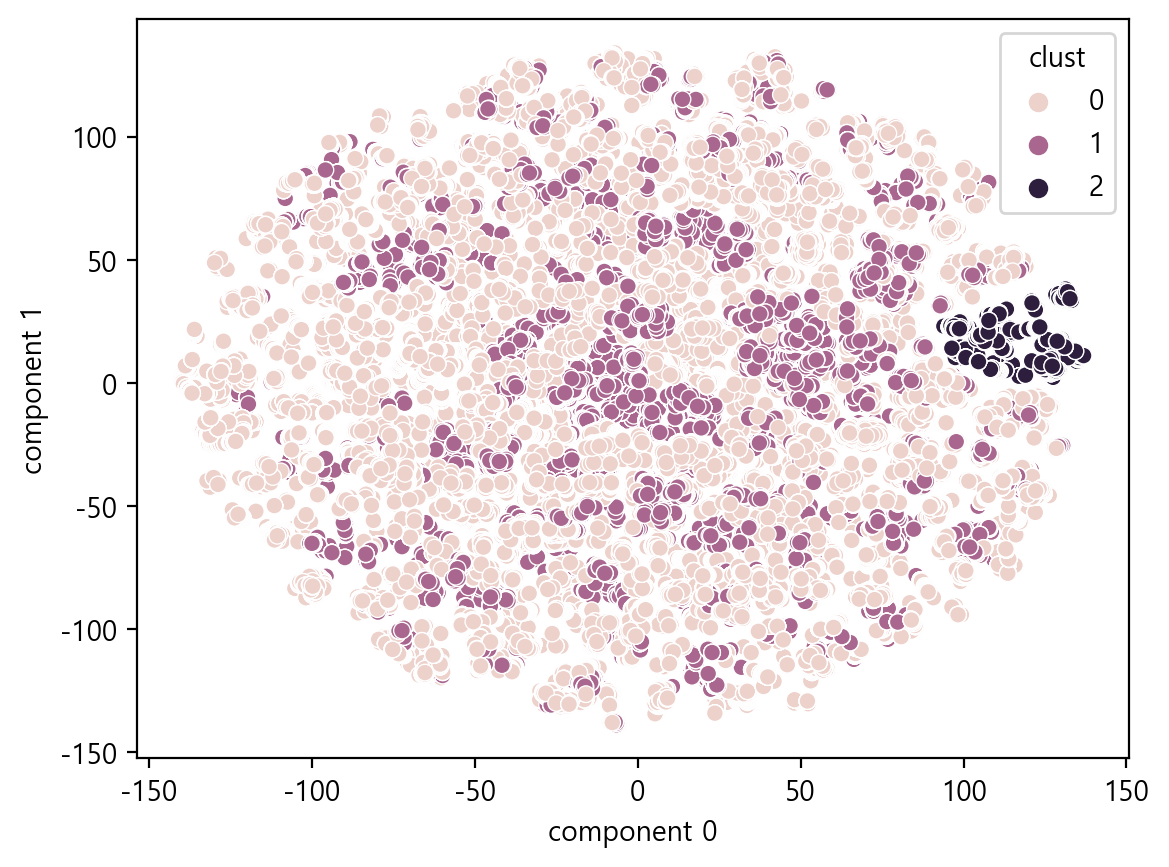

In [77]:
import seaborn as sns

df_tsne_sc["clust"] = clust
sns.scatterplot(x="component 0", y="component 1", data=df_tsne_sc, hue="clust")
plt.show()

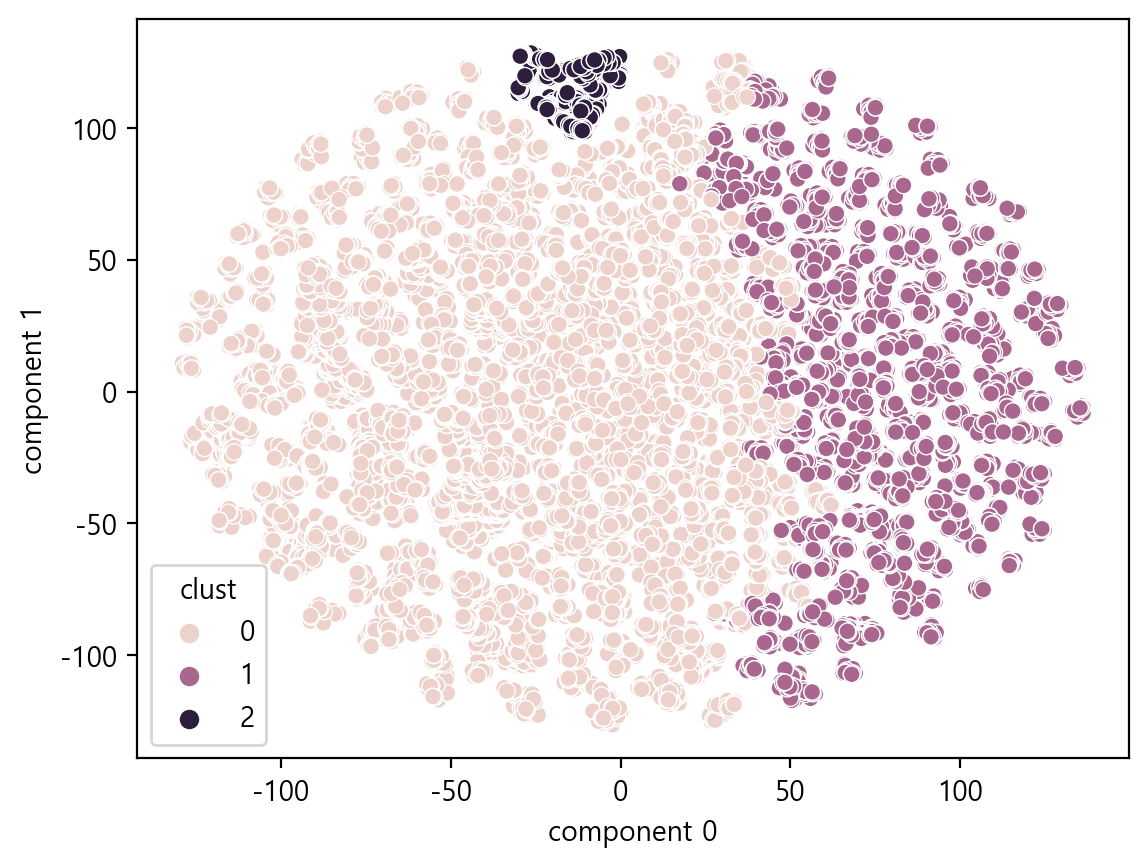

In [75]:
import seaborn as sns

df_tsne["clust"] = clust
sns.scatterplot(x="component 0", y="component 1", data=df_tsne, hue="clust")
plt.show()

In [113]:
df["clust"] = clust

In [115]:
df_0 = df[df["clust"] == 0]
df_1 = df[df["clust"] == 1]
df_2 = df[df["clust"] == 2]

In [118]:
df_0["SG전력사용량값"].mean()

1.9761616817329377

In [119]:
df_1["SG전력사용량값"].mean()

1.344808212212078

In [117]:
df_2["SG전력사용량값"].mean()

0.3299151641046946

In [120]:
print(len(df_0))
print(len(df_1))
print(len(df_2))

373793
445215
14442


In [394]:
X_0 = df_0.drop(["SG전력사용량값", "clust"], axis=1)
y_0 = df_0["SG전력사용량값"]
X_1 = df_1.drop(["SG전력사용량값", "clust"], axis=1)
y_1 = df_1["SG전력사용량값"]
X_2 = df_2.drop(["SG전력사용량값", "clust"], axis=1)
y_2 = df_2["SG전력사용량값"]

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=29)
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(X_train_0, y_train_0, test_size=0.2, random_state=29)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=29)
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=29)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=29)
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=29)

In [395]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

xgb = XGBRegressor()

xgb.fit(X_train_0, y_train_0)

xgb_pred = xgb.predict(X_test_0)
print(np.sqrt(mean_squared_error(y_test_0, xgb_pred)))
print(mean_absolute_error(y_test_0, xgb_pred))
print(mean_absolute_percentage_error(y_test_0, xgb_pred))
print(r2_score(y_test_0, xgb_pred))

2.2560420420346947
1.02631333946601
18.22853497693394
0.4480547832882069


In [396]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb = XGBRegressor()

xgb.fit(X_train_1, y_train_1)

xgb_pred = xgb.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test_1, xgb_pred)))
print(mean_absolute_error(y_test_1, xgb_pred))
print(mean_absolute_percentage_error(y_test_1, xgb_pred))
print(r2_score(y_test_1, xgb_pred))

2.9482334014609117
1.4105026510708594
16.177215918124165
0.41289976011158147


In [423]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb = XGBRegressor()

xgb.fit(X_train_2, y_train_2)

xgb_pred = xgb.predict(X_test_2)
print(np.sqrt(mean_squared_error(y_test_2, xgb_pred)))
print(mean_absolute_error(y_test_2, xgb_pred))
print(mean_absolute_percentage_error(y_test_2, xgb_pred))

0.1542424645077421
0.11735072834360707
0.7851976236174069


In [399]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(X_train_0, y_train_0)

lgb_pred = lgb.predict(X_test_0)
print(np.sqrt(mean_squared_error(y_test_0, lgb_pred)))
print(mean_absolute_error(y_test_0, lgb_pred))
print(mean_absolute_percentage_error(y_test_0, lgb_pred))
print(r2_score(y_test_0, lgb_pred))

2.3144055884234453
1.0515644188966433
18.97276323719842
0.4191278757628002


In [400]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(X_train_1, y_train_1)

lgb_pred = lgb.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test_1, lgb_pred)))
print(mean_absolute_error(y_test_1, lgb_pred))
print(mean_absolute_percentage_error(y_test_1, lgb_pred))
print(r2_score(y_test_1, lgb_pred))

3.0226876109796645
1.458785422694449
16.852281079000484
0.38287226418765863


In [422]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(X_train_2, y_train_2)

lgb_pred = lgb.predict(X_test_2)
print(np.sqrt(mean_squared_error(y_test_2, lgb_pred)))
print(mean_absolute_error(y_test_2, lgb_pred))
print(mean_absolute_percentage_error(y_test_2, lgb_pred))
print(r2_score(y_test_2, lgb_pred))

0.1726482888263454
0.13523164541885685
0.9515690521633279
0.5245959843437621


In [402]:
from sklearn.preprocessing import RobustScaler

mm = RobustScaler()

scaled_train_0 = mm.fit_transform(X_train_0)
scaled_valid_0 = mm.transform(X_valid_0)
scaled_test_0 = mm.transform(X_test_0)

mm = RobustScaler()

scaled_train_1 = mm.fit_transform(X_train_1)
scaled_valid_1 = mm.transform(X_valid_1)
scaled_test_1 = mm.transform(X_test_1)

mm = RobustScaler()

scaled_train_2 = mm.fit_transform(X_train_2)
scaled_valid_2 = mm.transform(X_valid_2)
scaled_test_2 = mm.transform(X_test_2)

In [406]:
from tensorflow.keras import regularizers
from keras.layers import Bidirectional, LayerNormalization, BatchNormalization

model = Sequential()
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True), input_shape=(22, 1)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(128, activation="tanh", return_sequences=False, kernel_regularizer=regularizers.l2(0.01))))
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))



lr = 1e-3
optim = keras.optimizers.Adam(lr=lr)

early_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

model.compile(loss="mean_squared_error", optimizer=optim, metrics="mean_squared_error")

history = model.fit(scaled_train_0, y_train_0, validation_data=[scaled_valid_0, y_valid_0], batch_size=128,
          epochs=500, callbacks=[early_cb, reduce_lr])

pred_lstm = model.predict(scaled_test_0)
print(np.sqrt(mean_squared_error(y_test_0, pred_lstm)))
print(mean_absolute_error(y_test_0, pred_lstm))
print(mean_absolute_percentage_error(y_test_0, pred_lstm))

Epoch 1/500


c:\Users\D\Anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2227/2227 [==============================] - 57s 23ms/step - loss: 9.3214 - mean_squared_error: 8.0569 - val_loss: 8.0377 - val_mean_squared_error: 7.7402 - lr: 0.0010
Epoch 2/500
2227/2227 [==============================] - 48s 22ms/step - loss: 7.7561 - mean_squared_error: 7.4830 - val_loss: 7.6006 - val_mean_squared_error: 7.3559 - lr: 0.0010
Epoch 3/500
2227/2227 [==============================] - 48s 22ms/step - loss: 7.4041 - mean_squared_error: 7.1663 - val_loss: 7.3694 - val_mean_squared_error: 7.1458 - lr: 0.0010
Epoch 4/500
2227/2227 [==============================] - 49s 22ms/step - loss: 7.1959 - mean_squared_error: 6.9824 - val_loss: 6.9456 - val_mean_squared_error: 6.7448 - lr: 0.0010
Epoch 5/500
2227/2227 [==============================] - 52s 23ms/step - loss: 7.0262 - mean_squared_error: 6.8319 - val_loss: 6.8259 - val_mean_squared_error: 6.6293 - lr: 0.0010
Epoch 6/500
2227/2227 [==============================] - 56s 25ms/step - loss: 6.9553 - mean_squared_error: 6.72

In [412]:
from tensorflow.keras import regularizers
from keras.layers import Bidirectional, LayerNormalization, BatchNormalization

model = Sequential()
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True), input_shape=(22, 1)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(128, activation="tanh", return_sequences=False, kernel_regularizer=regularizers.l2(0.01))))
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))



lr = 1e-3
optim = keras.optimizers.Adam(lr=lr)

early_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

model.compile(loss="mean_squared_error", optimizer=optim, metrics="mean_squared_error")

history = model.fit(scaled_train_1, y_train_1, validation_data=[scaled_valid_1, y_valid_1], batch_size=128,
          epochs=500, callbacks=[early_cb, reduce_lr])

pred_lstm = model.predict(scaled_test_1)
print(np.sqrt(mean_squared_error(y_test_1, pred_lstm)))
print(mean_absolute_error(y_test_1, pred_lstm))
print(mean_absolute_percentage_error(y_test_1, pred_lstm))

Epoch 1/500


c:\Users\D\Anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1869/1869 [==============================] - 51s 23ms/step - loss: 13.5789 - mean_squared_error: 11.9103 - val_loss: 11.5285 - val_mean_squared_error: 11.1037 - lr: 0.0010
Epoch 2/500
1869/1869 [==============================] - 42s 23ms/step - loss: 10.8231 - mean_squared_error: 10.4791 - val_loss: 10.5076 - val_mean_squared_error: 10.2441 - lr: 0.0010
Epoch 3/500
1869/1869 [==============================] - 42s 22ms/step - loss: 10.2323 - mean_squared_error: 9.9728 - val_loss: 10.2116 - val_mean_squared_error: 9.9599 - lr: 0.0010
Epoch 4/500
1869/1869 [==============================] - 43s 23ms/step - loss: 9.9907 - mean_squared_error: 9.7178 - val_loss: 10.1517 - val_mean_squared_error: 9.9247 - lr: 0.0010
Epoch 5/500
1869/1869 [==============================] - 43s 23ms/step - loss: 9.7903 - mean_squared_error: 9.5424 - val_loss: 9.9506 - val_mean_squared_error: 9.7278 - lr: 0.0010
Epoch 6/500
1869/1869 [==============================] - 40s 22ms/step - loss: 9.6325 - mean_squared_

In [421]:
from tensorflow.keras import regularizers
from keras.layers import Bidirectional, LayerNormalization, BatchNormalization

model = Sequential()
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True), input_shape=(22, 1)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(256, activation="tanh", return_sequences=True)))
model.add(LayerNormalization())
model.add(Bidirectional(LSTM(128, activation="tanh", return_sequences=False, kernel_regularizer=regularizers.l2(0.01))))
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))



lr = 1e-3
optim = keras.optimizers.Adam(lr=lr)

early_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

model.compile(loss="mean_squared_error", optimizer=optim, metrics="mean_squared_error")

history = model.fit(scaled_train_2, y_train_2, validation_data=[scaled_valid_2, y_valid_2], batch_size=128,
          epochs=500, callbacks=[early_cb, reduce_lr])

pred_lstm = model.predict(scaled_test_2)
print(np.sqrt(mean_squared_error(y_test_2, pred_lstm)))
print(mean_absolute_error(y_test_2, pred_lstm))
print(mean_absolute_percentage_error(y_test_2, pred_lstm))

Epoch 1/500


c:\Users\D\Anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


73/73 [==============================] - 9s 44ms/step - loss: 6.6301 - mean_squared_error: 0.0889 - val_loss: 1.7180 - val_mean_squared_error: 0.0685 - lr: 0.0010
Epoch 2/500
73/73 [==============================] - 2s 22ms/step - loss: 0.8062 - mean_squared_error: 0.0681 - val_loss: 0.3341 - val_mean_squared_error: 0.0680 - lr: 0.0010
Epoch 3/500
73/73 [==============================] - 2s 22ms/step - loss: 0.2083 - mean_squared_error: 0.0662 - val_loss: 0.1340 - val_mean_squared_error: 0.0682 - lr: 0.0010
Epoch 4/500
73/73 [==============================] - 2s 22ms/step - loss: 0.1061 - mean_squared_error: 0.0659 - val_loss: 0.0871 - val_mean_squared_error: 0.0640 - lr: 0.0010
Epoch 5/500
73/73 [==============================] - 2s 22ms/step - loss: 0.0804 - mean_squared_error: 0.0641 - val_loss: 0.0744 - val_mean_squared_error: 0.0629 - lr: 0.0010
Epoch 6/500
73/73 [==============================] - 2s 22ms/step - loss: 0.0719 - mean_squared_error: 0.0626 - val_loss: 0.0713 - val_me

In [307]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

xgb = XGBRegressor()

xgb.fit(scaled_train_1, y_train_1)

xgb_pred = xgb.predict(scaled_test_1)
print(np.sqrt(mean_squared_error(y_test_1, xgb_pred)))
print(mean_absolute_error(y_test_1, xgb_pred))
print(mean_absolute_percentage_error(y_test_1, xgb_pred))

2.080033338660703
1.1134103808242493
4.917431526658091


In [317]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

xgb = XGBRegressor()

xgb.fit(scaled_train_2, y_train_2)

xgb_pred = xgb.predict(scaled_test_2)
print(np.sqrt(mean_squared_error(y_test_2, xgb_pred)))
print(mean_absolute_error(y_test_2, xgb_pred))
print(mean_absolute_percentage_error(y_test_2, xgb_pred))

0.8757908412236862
0.439853179454154
3.2531527988058935


In [316]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(scaled_train_1, y_train_1)

lgb_pred = lgb.predict(scaled_test_1)
print(np.sqrt(mean_squared_error(y_test_1, lgb_pred)))
print(mean_absolute_error(y_test_1, lgb_pred))
print(mean_absolute_percentage_error(y_test_1, lgb_pred))

2.091023690134936
1.1309505698526656
5.457340907366431


In [315]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(scaled_train_2, y_train_2)

lgb_pred = lgb.predict(scaled_test_2)
print(np.sqrt(mean_squared_error(y_test_2, lgb_pred)))
print(mean_absolute_error(y_test_2, lgb_pred))
print(mean_absolute_percentage_error(y_test_2, lgb_pred))

0.8744149919594666
0.43665173248843514
2.97155978754658


In [72]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[10,])])
decoder = keras.models.Sequential([keras.layers.Dense(10, input_shape=[2,])])
autoencoder = keras.models.Sequential([encoder, decoder])

early_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

autoencoder.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=1e-5))
history = autoencoder.fit(X_train, X_train, epochs=20, validation_data=[X_valid, X_valid], callbacks=[early_cb])

Epoch 1/20
16669/16669 [==============================] - 38s 2ms/step - loss: 17.1686 - val_loss: 17.1399
Epoch 2/20
16669/16669 [==============================] - 38s 2ms/step - loss: 17.1371 - val_loss: 17.1107
Epoch 3/20
16669/16669 [==============================] - 37s 2ms/step - loss: 17.1091 - val_loss: 17.0836
Epoch 4/20
16669/16669 [==============================] - 36s 2ms/step - loss: 17.0830 - val_loss: 17.0582
Epoch 5/20
16669/16669 [==============================] - 34s 2ms/step - loss: 17.0581 - val_loss: 17.0338
Epoch 6/20
16669/16669 [==============================] - 33s 2ms/step - loss: 17.0340 - val_loss: 17.0102
Epoch 7/20
16669/16669 [==============================] - 35s 2ms/step - loss: 17.0108 - val_loss: 16.9869
Epoch 8/20
16669/16669 [==============================] - 36s 2ms/step - loss: 16.9877 - val_loss: 16.9644
Epoch 9/20
16669/16669 [==============================] - 36s 2ms/step - loss: 16.9656 - val_loss: 16.9418
Epoch 10/20
16669/16669 [============

In [73]:
coding = encoder.predict(X_train)
df_ae = pd.DataFrame(coding, columns = ['component 0', 'component 1'])
km = KMeans(n_clusters=3)
clust = km.fit_predict(X_train)
df_ae["clust"] = clust

16669/16669 [==============================] - 11s 671us/step


c:\Users\D\Anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
early_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [56]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=1e-5))
history = autoencoder.fit(scaled_train, scaled_train, epochs=20, validation_data=[scaled_valid, scaled_valid], callbacks=[early_cb])

Epoch 1/20
16669/16669 [==============================] - 37s 2ms/step - loss: 12.6128 - val_loss: 9.7895
Epoch 2/20
16669/16669 [==============================] - 36s 2ms/step - loss: 8.2937 - val_loss: 6.7013
Epoch 3/20
16669/16669 [==============================] - 36s 2ms/step - loss: 5.7184 - val_loss: 4.6124
Epoch 4/20
16669/16669 [==============================] - 37s 2ms/step - loss: 3.8375 - val_loss: 2.9870
Epoch 5/20
16669/16669 [==============================] - 36s 2ms/step - loss: 2.4259 - val_loss: 1.8679
Epoch 6/20
16669/16669 [==============================] - 36s 2ms/step - loss: 1.5651 - val_loss: 1.2836
Epoch 7/20
16669/16669 [==============================] - 36s 2ms/step - loss: 1.1162 - val_loss: 0.9339
Epoch 8/20
16669/16669 [==============================] - 37s 2ms/step - loss: 0.8182 - val_loss: 0.7067
Epoch 9/20
16669/16669 [==============================] - 37s 2ms/step - loss: 0.6498 - val_loss: 0.5965
Epoch 10/20
16669/16669 [=============================

In [57]:
coding = encoder.predict(scaled_train)

16669/16669 [==============================] - 11s 627us/step


In [59]:
df_ae = pd.DataFrame(coding, columns = ['component 0', 'component 1'])

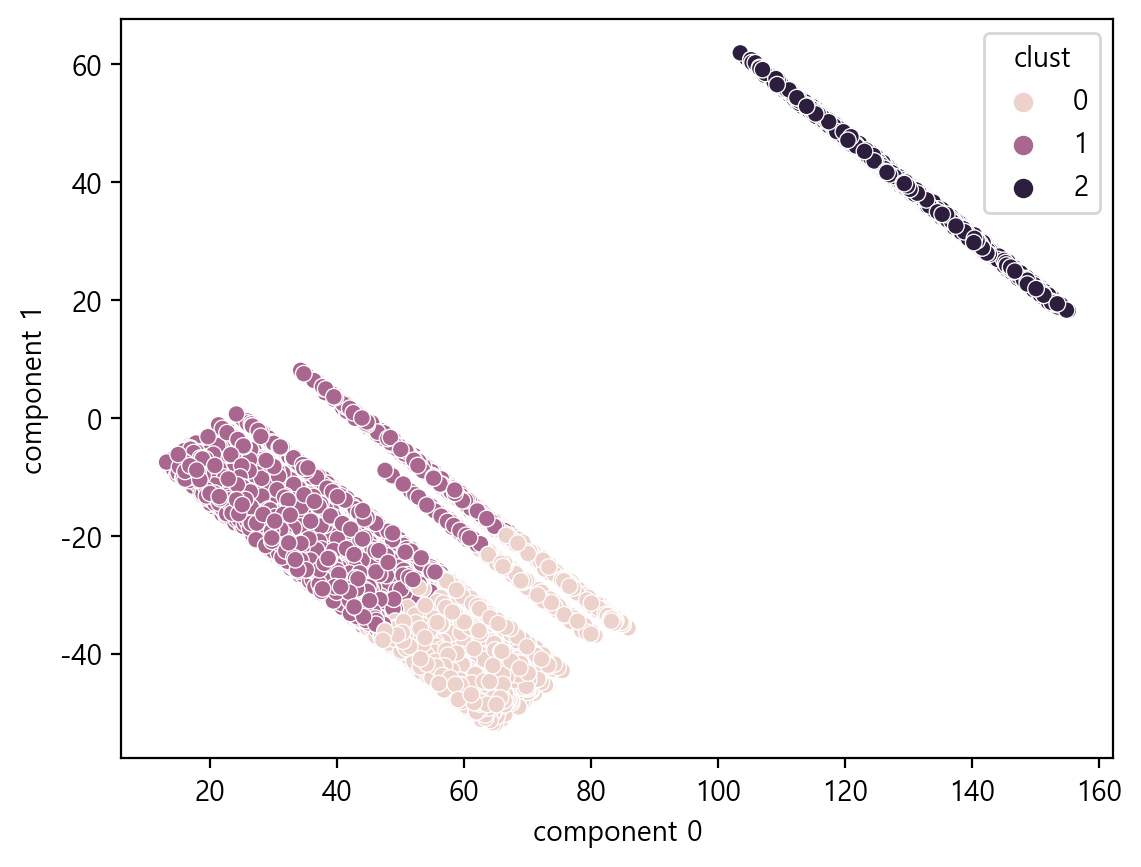

In [74]:
import seaborn as sns

sns.scatterplot(x="component 0", y="component 1", data=df_ae, hue="clust")
plt.show()